In [45]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error,r2_score

In [46]:
data=pd.read_csv("Gold price (INR).csv")
data.head(5)

,Date,Price,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,May-24,"72,050",NaN,NaN,NaN,NaN,NaN
1,Apr-24,"70,415",NaN,NaN,NaN,NaN,NaN
2,Mar-24,"67,677",NaN,NaN,NaN,NaN,NaN
3,Feb-24,"62,567",NaN,NaN,NaN,NaN,NaN
4,Jan-24,"62,958",NaN,NaN,NaN,NaN,NaN


In [47]:
data=data.drop(["Unnamed: 2"],axis=1)
data=data.drop(["Unnamed: 3"],axis=1)
data=data.drop(["Unnamed: 4"],axis=1)
data=data.drop(["Unnamed: 5"],axis=1)
data=data.drop(["Unnamed: 6"],axis=1)

In [48]:
data.head(5)

,Date,Price
0,May-24,"72,050"
1,Apr-24,"70,415"
2,Mar-24,"67,677"
3,Feb-24,"62,567"
4,Jan-24,"62,958"


In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236 entries, 0 to 235
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    236 non-null    object
 1   Price   236 non-null    object
dtypes: object(2)
memory usage: 3.8+ KB


In [50]:
data.isnull().sum()

Date     0
Price    0
dtype: int64

In [51]:
data["Date"]=pd.to_datetime(data["Date"],format='%b-%y')
data = data.sort_values('Date')
data.set_index('Date', inplace=True)

In [52]:
data.head(5)

,Price
Date,
2004-10-01,"6,329"
2004-11-01,"6,528"
2004-12-01,"6,307"
2005-01-01,"6,000"
2005-02-01,"6,245"


In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 236 entries, 2004-10-01 to 2024-05-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Price   236 non-null    object
dtypes: object(1)
memory usage: 3.7+ KB


In [54]:
data['Price'] = data['Price'].str.replace(',', '', regex=False)

In [55]:
data['Price'] = pd.to_numeric(data['Price'], errors='coerce')

In [56]:
data['Price'] = data['Price'].fillna(0)

In [57]:
data['Price'] = data['Price'].astype(int)

In [58]:
data.head(5)

,Price
Date,
2004-10-01,6329
2004-11-01,6528
2004-12-01,6307
2005-01-01,6000
2005-02-01,6245


In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 236 entries, 2004-10-01 to 2024-05-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Price   236 non-null    int64
dtypes: int64(1)
memory usage: 3.7 KB


In [60]:
data.describe()

,Price
count,236.000000
mean,28828.309322
std,15695.211732
min,5966.000000
25%,15653.250000
50%,28451.000000
75%,34283.750000
max,72050.000000


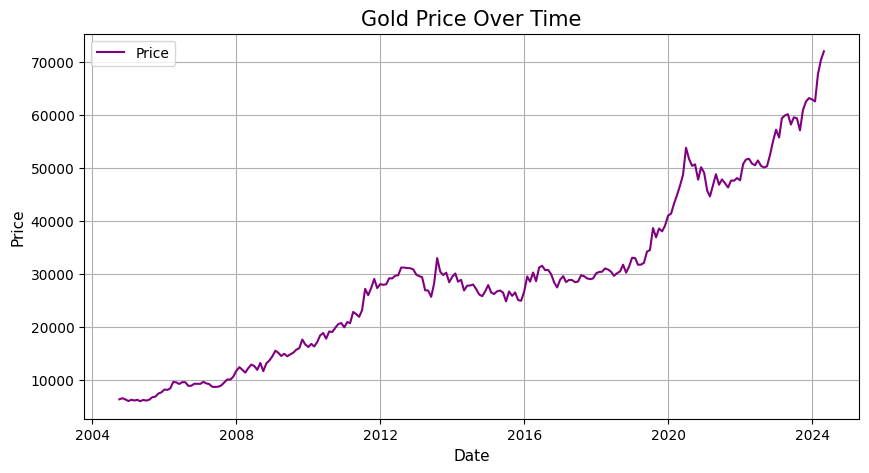

In [61]:
plt.figure(figsize=(10,5))
sns.lineplot(x="Date",y="Price",data=data,color="purple")
plt.legend(["Price"])
plt.title("Gold Price Over Time",fontsize=15)
plt.xlabel("Date",fontsize=11)
plt.ylabel("Price",fontsize=11)
plt.grid(True)
plt.show()

In [62]:
first_difference=data["Price"].diff()[1:]

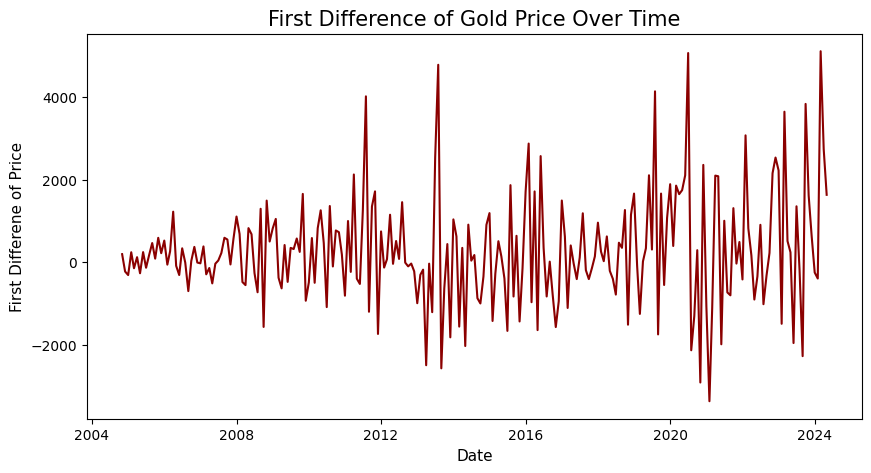

In [84]:
plt.figure(figsize=(10,5))
plt.plot(first_difference,color="darkred")
plt.title("First Difference of Gold Price Over Time",fontsize=15)
plt.xlabel("Date",fontsize=11)
plt.ylabel("First Differene of Price",fontsize=11)
plt.show()

In [64]:
from statsmodels.tsa.stattools import adfuller
result=adfuller(first_difference)

In [65]:
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Used Lag:', result[2])
print('Number of Observations Used:', result[3])
print('Critical Values:', result[4])
print('IC Best:', result[5])

if result[1] <= 0.05:
    print("The time series is likely stationary.")
else:
    print("The time series is likely not stationary.")

ADF Statistic: -16.345172416710632
p-value: 2.9693138144897033e-29
Used Lag: 0
Number of Observations Used: 234
Critical Values: {'1%': -3.4586084859607156, '5%': -2.873972159235721, '10%': -2.57339565928848}
IC Best: 3782.9059521430854
The time series is likely stationary.


In [66]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import acf, pacf

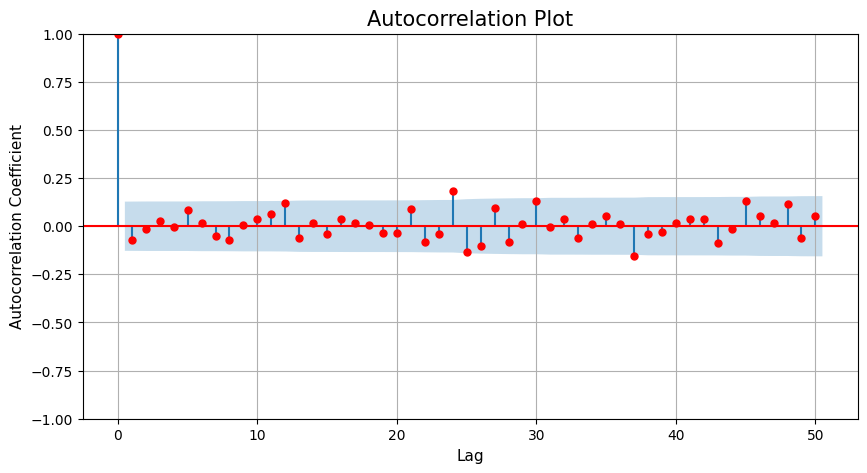

In [67]:
fig = plt.figure(figsize=(10, 5))
acf_plot=plot_acf(first_difference,lags=50,ax=fig.gca(),color="red")
plt.title("Autocorrelation Plot",fontsize=15)
plt.xlabel("Lag",fontsize=11)
plt.ylabel("Autocorrelation Coefficient",fontsize=11)
plt.grid(True)
plt.show()

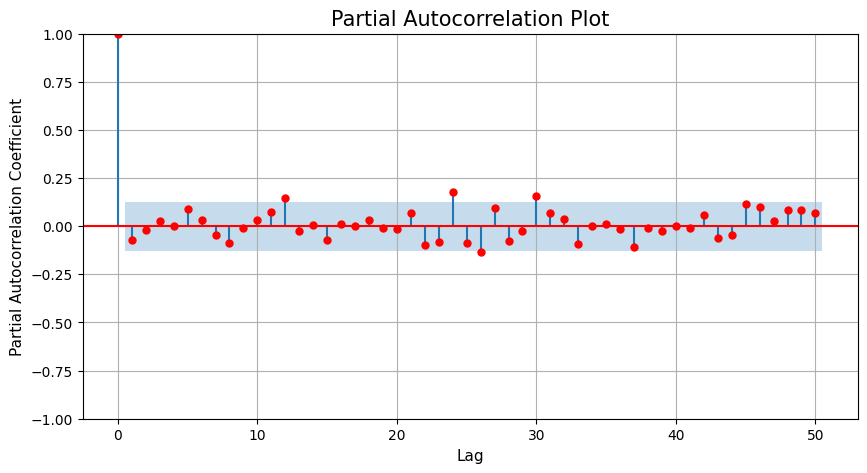

In [68]:
fig = plt.figure(figsize=(10, 5))
pacf_plot=plot_pacf(first_difference,lags=50,ax=fig.gca(),color="red")
plt.title("Partial Autocorrelation Plot",fontsize=15)
plt.xlabel("Lag",fontsize=11)
plt.ylabel("Partial Autocorrelation Coefficient",fontsize=11)
plt.grid(True)
plt.show()

In [69]:
num_split=int(data['Price'].shape[0]*0.8)
train_set=data['Price'].iloc[:num_split]
test_set=data['Price'].iloc[num_split:]
test_set

Date
2020-06-01    48762
2020-07-01    53828
2020-08-01    51701
2020-09-01    50404
2020-10-01    50699
2020-11-01    47792
2020-12-01    50151
2021-01-01    49096
2021-02-01    45736
2021-03-01    44637
2021-04-01    46737
2021-05-01    48821
2021-06-01    46839
2021-07-01    47846
2021-08-01    47120
2021-09-01    46323
2021-10-01    47635
2021-11-01    47606
2021-12-01    48099
2022-01-01    47686
2022-02-01    50760
2022-03-01    51585
2022-04-01    51754
2022-05-01    50855
2022-06-01    50517
2022-07-01    51426
2022-08-01    50414
2022-09-01    50094
2022-10-01    50322
2022-11-01    52480
2022-12-01    55017
2023-01-01    57242
2023-02-01    55756
2023-03-01    59402
2023-04-01    59919
2023-05-01    60163
2023-06-01    58211
2023-07-01    59568
2023-08-01    59374
2023-09-01    57105
2023-10-01    60940
2023-11-01    62559
2023-12-01    63203
2024-01-01    62958
2024-02-01    62567
2024-03-01    67677
2024-04-01    70415
2024-05-01    72050
Name: Price, dtype: int64

In [70]:
import pmdarima as pm
model = pm.auto_arima(train_set, start_p=0, start_q=0, start_order=0, max_p=10 ,max_q=10, max_order=10, test='adf', stepwise=False, trace=True, seasonal=False)


 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3150.497, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3148.041, Time=0.08 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=3150.512, Time=0.04 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=3152.705, Time=0.04 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=3155.006, Time=0.06 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=3155.955, Time=0.06 sec
 ARIMA(0,1,6)(0,0,0)[0] intercept   : AIC=3157.086, Time=0.06 sec
 ARIMA(0,1,7)(0,0,0)[0] intercept   : AIC=3159.096, Time=0.08 sec
 ARIMA(0,1,8)(0,0,0)[0] intercept   : AIC=3158.556, Time=0.19 sec
 ARIMA(0,1,9)(0,0,0)[0] intercept   : AIC=3160.307, Time=0.24 sec
 ARIMA(0,1,10)(0,0,0)[0] intercept   : AIC=3161.929, Time=0.28 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3148.086, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3150.119, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=3152.171, Time=0.15 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=3154.359, Time=0.05 sec
 ARIMA(1,

In [71]:
best_order = model.order
best_model = model.arima_res_
best_model_summary = best_model.summary()
print('Best order:', best_order)
print('Best model summary:\n', best_model_summary)

Best order: (0, 1, 1)
Best model summary:
                                SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  188
Model:               SARIMAX(0, 1, 1)   Log Likelihood               -1571.020
Date:                Fri, 06 Sep 2024   AIC                           3148.041
Time:                        01:24:10   BIC                           3157.734
Sample:                    10-01-2004   HQIC                          3151.969
                         - 05-01-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    217.8146     74.513      2.923      0.003      71.772     363.858
ma.L1         -0.1519      0.063     -2.427      0.015      -0.275      -0.029
sigma2   

In [72]:
from datetime import datetime
from datetime import timedelta
rolling_pred=test_set.copy()
for split_num in test_set.index:
    train_set=data["Price"][:split_num-timedelta(days=1)]
    model=ARIMA(train_set,order=best_order)
    model_fit=model.fit()
    pred=model_fit.forecast()
    rolling_pred[split_num]=pred

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/var/folders/km/41xdld515hq8qyv7nx3qq6n80000gn/T/ipykernel_4165/997252079.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[46465.14149433]' has dtype incompatible with int64, please ex

In [73]:
from statsmodels.stats.diagnostic import acorr_ljungbox
lb_test = acorr_ljungbox(rolling_residual, lags=[10], return_df=True)
print(lb_test)


     lb_stat  lb_pvalue
10  0.318736   0.999999


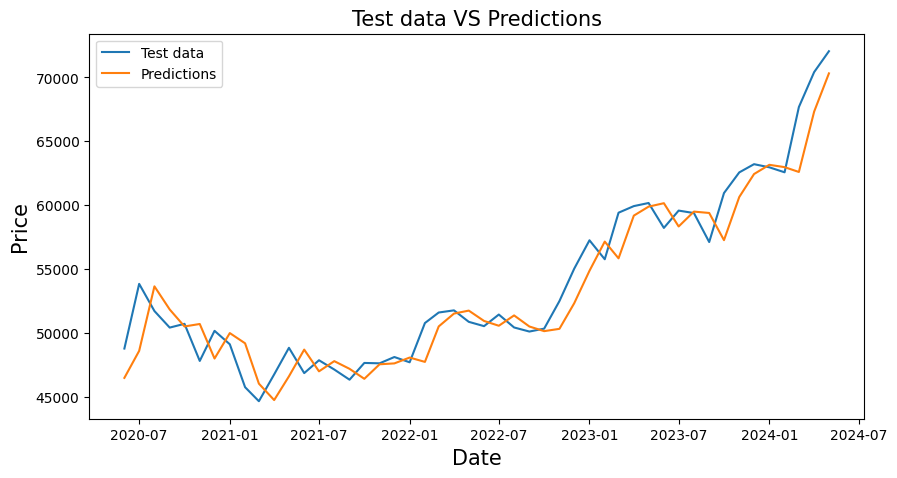

In [74]:
plt.figure(figsize=(10,5))
plt.plot(test_set.index, test_set.values, label='Test data')
plt.plot(test_set.index, rolling_pred.values, label='Predictions')
plt.title('Test data VS Predictions', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.xlabel("Date",fontsize=15)
plt.legend()
plt.show()

In [80]:
from sklearn.metrics import mean_absolute_percentage_error,r2_score
mape = mean_absolute_percentage_error(test_set.values, rolling_pred.values)
r2=r2_score(test_set.values, rolling_pred.values)
print('MAPE:', mape*100)
print("R2 Score :",r2*100)

MAPE: 2.9417139394361502
R2 Score : 90.92647895090555
